# BERT

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.5 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 57.8 MB/s 
     |████████████████████████████████| 6.6 MB 17.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
!pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 574 kB 6.9 MB/s 
     |████████████████████████████████| 175 kB 67.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=f1c4089cad399d1b82310b30643eabd6bcc1e6c3f310243bf2bca289d8b3588f
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [3]:
!pip install sklearn_crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 2.9 MB/s 


In [4]:
!pip install -U 'scikit-learn<0.24'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 9.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [5]:
! pip install natasha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.4 MB 140 kB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 1.4 MB/s 
     |████████████████████████████████| 41 kB 62 kB/s 
     |████████████████████████████████| 8.2 MB 11.9 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=504ce1bdba1f2451756bd193e0332238e6bb81bf510e727939cd3f24bcc291bb
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [6]:
import os
import pandas as pd
import re
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm.notebook import tqdm
import nltk
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from collections import defaultdict
from textwrap import wrap

nltk.download('punkt')

import stanza
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import cross_val_score
from collections import Counter
import seaborn as sns
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Загружаем модель

In [7]:
PRE_TRAINED_MODEL_NAME = "DeepPavlov/rubert-base-cased"

In [8]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

### Готовим данные

In [9]:
sents_data = pd.read_csv('sents_Wiki_tagged.csv', dtype={'sent_index': str, 'sent_text': str, 'def': int}, sep=';')
sents_data = sents_data.rename(columns = {'def' : 'has_def'}) 

In [10]:
shuffle =  sents_data.sample(frac=1).reset_index(drop=True) 

In [11]:
sents_data = shuffle[:700]
sents_data_test = shuffle[700:]

### Смотрим на данные

In [12]:
sents_data.head()

,Unnamed: 0,sent_index,sent_text,has_def
0,458,21677,"Пареми́я (от греч. παροιμία — поговорка, посло...",1
1,367,16207,"Доиндоевропейский субстрат — языки, существова...",1
2,517,19,Частью общей лингвистики является лингвистичес...,0
3,757,1140,Информация о шумерском языке была записана акк...,0
4,109,1419,Традиционные теории структуры предложения деля...,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


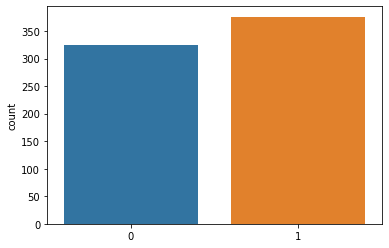

In [13]:
sns.countplot(list(sents_data['has_def']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


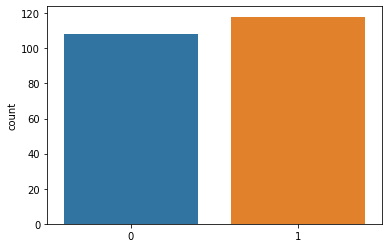

In [14]:
sns.countplot(list(sents_data_test['has_def']))

In [15]:
from statistics import mean
lens = [len(i.split()) for i in list(sents_data['sent_text'])]
mean(lens)

21.50857142857143

### Датасет

In [16]:
class SentsDataset(Dataset):

  def __init__(self, sents, targets, tokenizer, max_len):
    self.sents = sents
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.sents)
  
  def __getitem__(self, item):
    sent = str(self.sents[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      sent,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True
    )

    return {
      'sent_text':sent,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [17]:
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
df_train, df_test = train_test_split(sents_data, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(sents_data_test, test_size=0.5, random_state=RANDOM_SEED)

In [19]:
MAX_LEN = 128

### DataLoader

In [20]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SentsDataset(
    sents=df.sent_text.to_numpy(),
    targets=df.has_def.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=1
  )

In [21]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [22]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['sent_text', 'input_ids', 'attention_mask', 'targets'])

### Класс SentsClassifier

In [23]:
class SentsClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentsClassifier, self).__init__()
    self.bert = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)
  
  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    return output[0]

In [24]:
model = SentsClassifier(2)
model = model.to(device)

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

### Обучаем

In [25]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [26]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [27]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      
      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [28]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.3397386535652913 accuracy 0.8571428571428571
Val loss 0.287481976673007 accuracy 0.9380530973451328

Epoch 2/10
----------
Train loss 0.14183702260488645 accuracy 0.9555555555555556
Val loss 0.3599669500181335 accuracy 0.8938053097345132

Epoch 3/10
----------
Train loss 0.07657905226515141 accuracy 0.9793650793650793
Val loss 0.33719334928900935 accuracy 0.9292035398230089

Epoch 4/10
----------
Train loss 0.030664307477127294 accuracy 0.9936507936507937
Val loss 0.29235987048014067 accuracy 0.9380530973451328

Epoch 5/10
----------
Train loss 0.013668160611996428 accuracy 0.9968253968253968
Val loss 0.35902723064646125 accuracy 0.9292035398230089

Epoch 6/10
----------
Train loss 0.0120568673388334 accuracy 0.9984126984126984
Val loss 0.36835239578795154 accuracy 0.9292035398230089

Epoch 7/10
----------
Train loss 0.011271154378482607 accuracy 0.9984126984126984
Val loss 0.3688804105477175 accuracy 0.9292035398230089

Epoch 8/10
----------
Train lo

### Смотрим метрики

In [29]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.911504424778761

Ура! Выглядит неплохо...

In [30]:
import torch.nn.functional as F

In [31]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  sent_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sent_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      sent_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sent_texts, predictions, prediction_probs, real_values

In [32]:
y_sent_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [33]:
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.93      0.90      0.92        60

    accuracy                           0.91       113
   macro avg       0.91      0.91      0.91       113
weighted avg       0.91      0.91      0.91       113



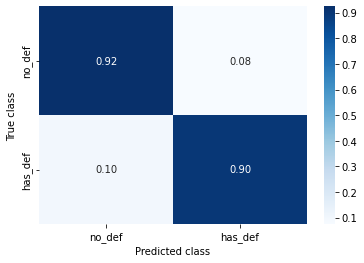

In [36]:
def show_confusion_matrix(confusion_matrix, class_names):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
  plt.ylabel('True class')
  plt.xlabel('Predicted class');

cm = confusion_matrix(y_test, y_pred)
cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
show_confusion_matrix(cmn, ["no_def", "has_def"])

### Тестируем на каком-либо предложении

In [39]:
def predict(model, sentence):
    encoded_text = tokenizer.encode_plus(
        sentence,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True)
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)

    output = model(input_ids, attention_mask)
    prediction = torch.argmax(output, dim=1)

    return prediction.cpu().numpy()[0]

In [40]:
predict(model, 'Лингвистика - это наука о языках, изучающая их как систему.')

1

# CRF

### Готовим файлы

In [41]:
df_sents = pd.read_csv('sents_Wiki_tagged.csv', dtype={'sent_index': str, 'sent_text': str, 'def': int}, sep=';')
sents_filtered = df_sents[df_sents['def'] > 0]
sents = list(sents_filtered['sent_text'])
ids = list(sents_filtered['sent_index'])

In [42]:
train_sents, dev_sents, train_ids, dev_ids = train_test_split(sents, ids)

In [44]:
df_tokens = pd.read_csv('tokens_Wiki_tagged.csv', dtype={'sent_index': str, 'token': str, 'tag': str}, sep=';')
tokens_filtered = df_tokens[df_tokens['sent_index'].isin(ids)]
tokens = list(tokens_filtered['token'])
t_ids = list(tokens_filtered['sent_index'])

In [45]:
def bio_sents(sents_ids, tokens_df):
    bio_sents = {}
    for i in sents_ids:
        bio_sents[i] = list(tokens_df.loc[tokens_df['sent_index']==i]['tag'])
    return bio_sents

In [46]:
bio_sents_train = bio_sents(train_ids, df_tokens)
bio_sents_test = bio_sents(dev_ids, df_tokens)

In [52]:
def get_bert_ebm(word):
    encoding = tokenizer.encode_plus(
        word,
        max_length=30,
        add_special_tokens=True, # Добавить '[CLS]' и '[SEP]'
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',  # Вернуть тензор PyTorch
        truncation=True)
    outputs = model(
        input_ids=encoding['input_ids'].to(device), 
        attention_mask=encoding['attention_mask'].to(device))
    return outputs.cpu().detach().numpy()

In [77]:
def word2features(sent, i):
    word = sent[i].text
    
    features = {}
    for iv,value in enumerate(get_bert_ebm(word)[0]):
        features['v{}'.format(iv)] = value
    if i > 0:
        word1 = sent[i-1].text
        for iv,value in enumerate(get_bert_ebm(word1)[0]):
            features['-1v{}'.format(iv)] = value
    else:
        features['BOS'] = True
        
    if i < len(sent)-1:
        word1 = sent[i+1].text
        for iv,value in enumerate(get_bert_ebm(word1)[0]):
            features['+1v{}'.format(iv)] = value
    else:
        features['EOS'] = True
                
    return features


def text2features(text):
    doc = Doc(text)
    sentences = doc.segment(segmenter)
    m = doc.tag_morph(morph_tagger)
    toks = []
    for tok in doc.tokens:
        toks.append(tok)
    return [word2features(toks, i) for i in range(len(toks))]

def text2labels(text_ids, labels):
    return [labels[i] for i in text_ids]

def text2tokens(text):
    doc = Doc(text)
    sentences = doc.segment(segmenter)
    toks = []
    for sent in sentences:
      for tok in doc.tokens:
        toks.append(tok)
    return toks

In [78]:
X_test = [text2features(s) for s in dev_sents]
y_test = text2labels(dev_ids, bio_sents_test)

In [79]:
X_train = [text2features(s) for s in train_sents]
y_train = text2labels(train_ids, bio_sents_train)

### Запускаем CRF

In [80]:
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

### Смотрим метрики

In [89]:
labels = list(crf.classes_)
y_pred = crf.predict(X_test)
metrics.flat_f1_score(y_test, y_pred, 
                      average='weighted', labels=labels)

0.5989486647835878

In [90]:
sorted_labels = sorted(
    labels, 
    key=lambda name: (name[1:], name[0])
)
print(metrics.flat_classification_report(
    y_test, y_pred, labels=sorted_labels, digits=3
))

              precision    recall  f1-score   support

           O      0.361     0.352     0.357      1033
       B-DEF      0.208     0.111     0.145       135
       I-DEF      0.706     0.773     0.738      2312
      B-TERM      0.850     0.799     0.824       149
      I-TERM      0.886     0.197     0.323       157

    accuracy                          0.612      3786
   macro avg      0.602     0.447     0.477      3786
weighted avg      0.607     0.612     0.599      3786



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['O', 'B-DEF', 'I-DEF', 'B-TERM', 'I-TERM'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


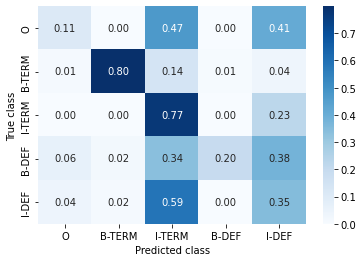

In [91]:
cm = confusion_matrix(sum(y_test, []), sum(y_pred, []))
cmn = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
show_confusion_matrix(cmn, class_names=labels)

### Тестируем на каком-либо предложении

In [92]:
crf.predict(text2features(s) for s in ['Любовь - это великое искусство.'])

[['B-TERM', 'O', 'O', 'O', 'O', 'O']]

# Тестируем всё вместе на каком-либо предложении

In [93]:
def predict_labels(inp):
    cls = predict(model, inp)
    if cls == 0:
        return 'Терминов и определений нет'
    else:
        return crf.predict(text2features(s) for s in [inp])

In [94]:
predict_labels('Обычно в биологии систематику определяют как раздел знаний о разнообразии организмов и взаимоотношениях между ними.')

'Терминов и определений нет'

In [95]:
predict_labels('Принципы таксономии применяются во многих научных областях знаний, для упорядочивания объектов географии, геологии, языкознания, этнографии и всего многообразия органического мира.')

'Терминов и определений нет'

In [96]:
predict_labels('Лингвистика - это наука о языках, изучающая их как систему.')

[['B-TERM', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]